In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('../input/no-title/train_dataset.csv')


In [3]:

test = pd.read_csv('../input/no-title/test_dataset.csv')

In [4]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [5]:
test.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3870,41,C,Placebo,22553,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,3462,1811,C,D-penicillamine,16223,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,1632,954,C,D-penicillamine,27100,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,722,1969,D,Placebo,17039,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,1000,2721,D,D-penicillamine,17738,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

In [7]:
train.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
dtype: int64

In [8]:
test.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug              963
Age                 0
Sex                 0
Ascites          1087
Hepatomegaly     1102
Spiders          1200
Edema               0
Bilirubin           0
Cholesterol      1435
Albumin             0
Copper           1006
Alk_Phos         1168
SGOT              987
Tryglicerides    1286
Platelets         164
Prothrombin        64
dtype: int64

In [9]:
train.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,6268.608088,1664.055441,22863.223529,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,2405.527133,1332.308135,4671.135682,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,1239.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4353.750000,537.000000,19416.500000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,6599.500000,1443.000000,23367.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,8299.250000,2519.000000,27125.500000,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,9999.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


In [10]:
train.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [11]:
#compute missing value percentage
def missing_percentage(df):
    for i in df.columns:
         print(i,df[i].isnull().sum()*100/6800)
            
def value_count(df):
    for i in df[['Drug','Sex','Ascites',
       'Hepatomegaly', 'Spiders', 'Edema','Stage']]:
        print(df[i].value_counts())

In [12]:
missing_percentage(train)

ID 0.0
N_Days 0.0
Status 0.0
Drug 29.779411764705884
Age 0.0
Sex 0.0
Ascites 33.029411764705884
Hepatomegaly 35.69117647058823
Spiders 38.088235294117645
Edema 0.0
Bilirubin 0.0
Cholesterol 45.60294117647059
Albumin 0.0
Copper 31.705882352941178
Alk_Phos 36.73529411764706
SGOT 30.91176470588235
Tryglicerides 41.35294117647059
Platelets 4.970588235294118
Prothrombin 2.2794117647058822
Stage 0.0


In [13]:
value_count(train)

D-penicillamine    2434
Placebo            2341
Name: Drug, dtype: int64
F    5835
M     965
Name: Sex, dtype: int64
N    3973
Y     581
Name: Ascites, dtype: int64
N    2554
Y    1819
Name: Hepatomegaly, dtype: int64
N    2910
Y    1300
Name: Spiders, dtype: int64
N    5326
S    1023
Y     451
Name: Edema, dtype: int64
4.0    3506
2.0    1507
3.0    1322
1.0     465
Name: Stage, dtype: int64


In [14]:
train['Age'] = train['Age'].map(lambda x: round(x/365))
test['Age'] = test['Age'].map(lambda x: round(x/365))

In [15]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,54,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,63,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,77,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,58,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,49,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [16]:
train.Status.value_counts()

C     3643
D     2619
CL     538
Name: Status, dtype: int64

In [17]:
train.Ascites.value_counts()

N    3973
Y     581
Name: Ascites, dtype: int64

In [18]:
train.Hepatomegaly.value_counts()

N    2554
Y    1819
Name: Hepatomegaly, dtype: int64

In [19]:
train.Spiders.value_counts()

N    2910
Y    1300
Name: Spiders, dtype: int64

In [20]:
train.Edema.value_counts()

N    5326
S    1023
Y     451
Name: Edema, dtype: int64

In [21]:
train.Drug.value_counts()

D-penicillamine    2434
Placebo            2341
Name: Drug, dtype: int64

# **EDA and Feature Engineering**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import skew

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Text(0.5, 1.0, 'Number of Example Per Class')

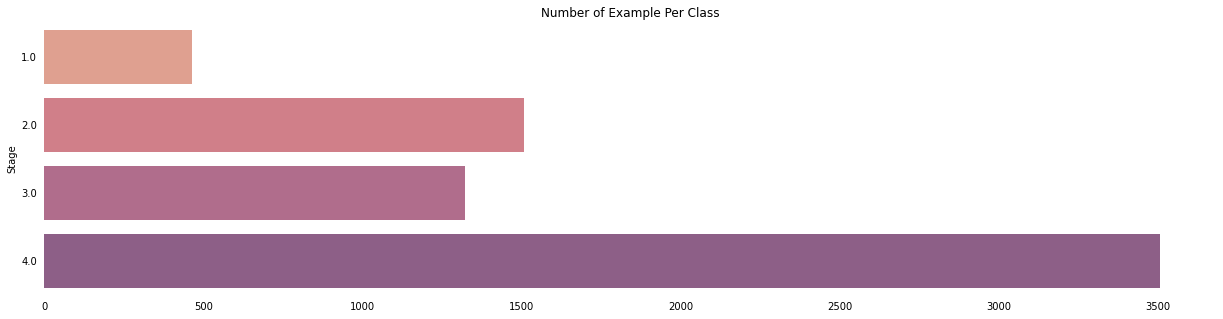

In [23]:
plt.figure(figsize=(21,5))
sns.countplot(y=train['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

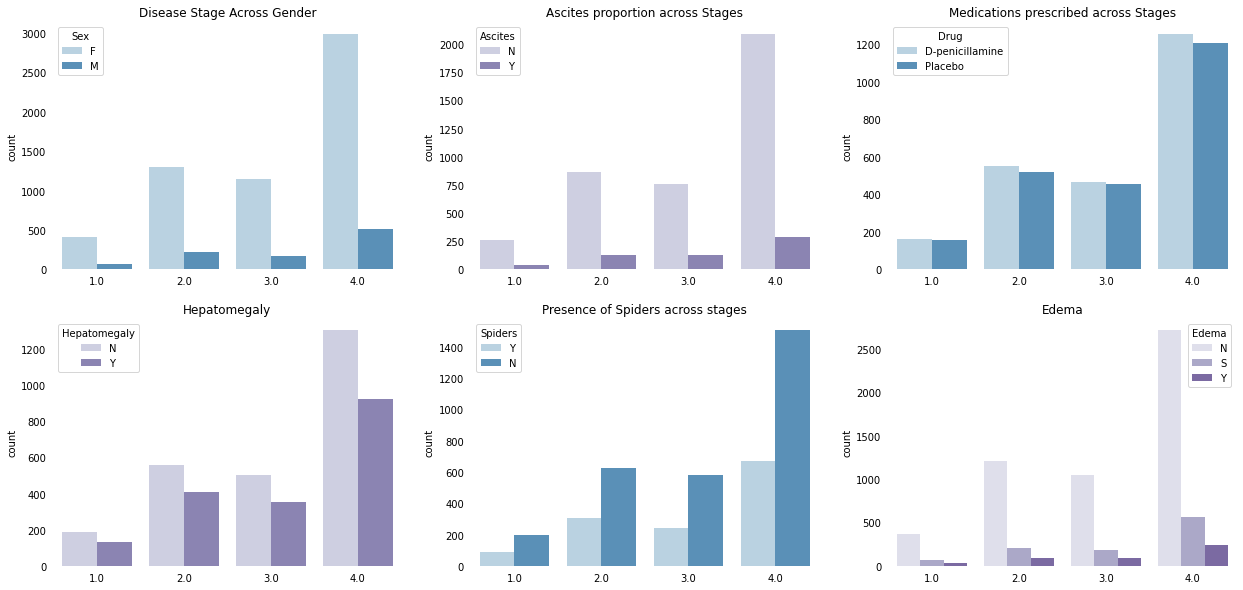

In [24]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=train['Stage'], hue=train['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=train['Stage'], hue=train['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=train['Stage'], hue=train['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=train['Stage'], hue=train['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=train['Stage'], hue=train['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=train['Stage'], hue=train['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

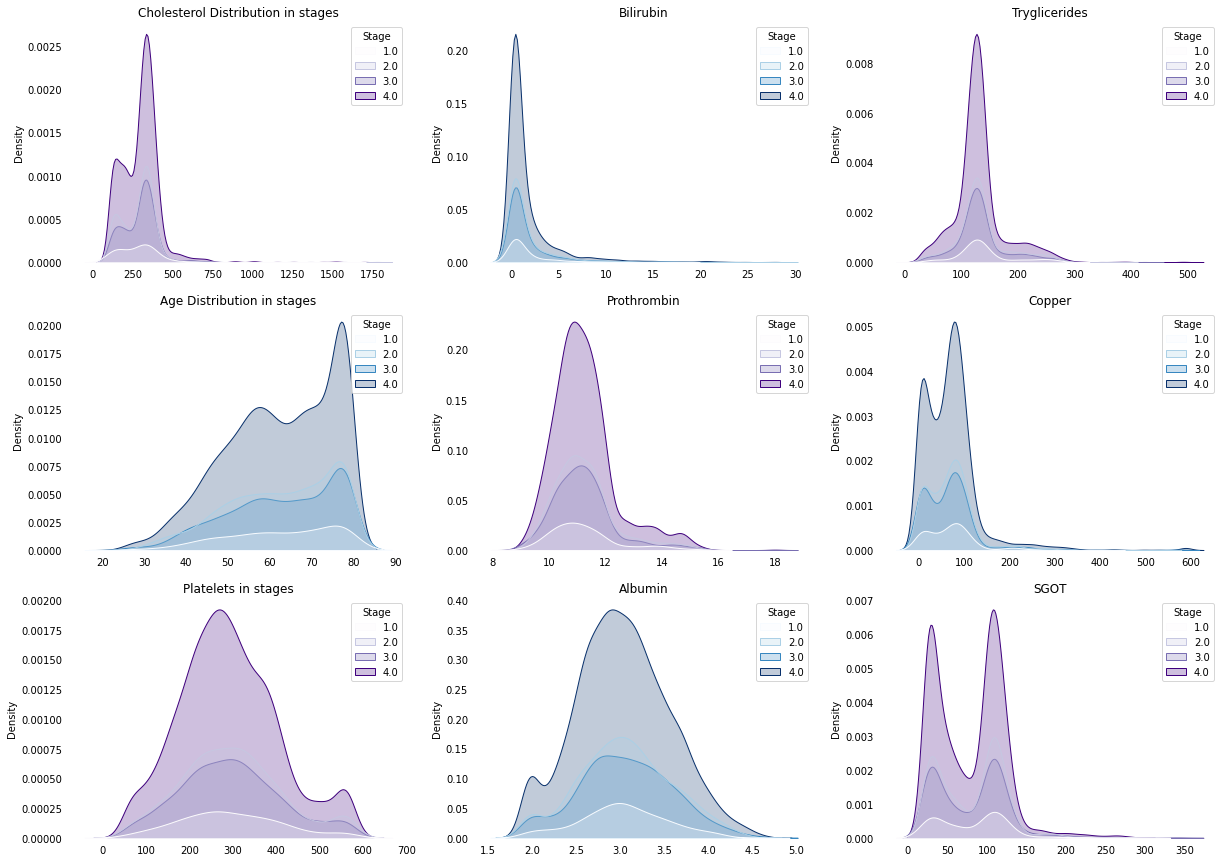

In [25]:
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(train['Cholesterol'], hue=train['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(train['Bilirubin'], hue=train['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(train['Tryglicerides'], hue=train['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(train['Age'], hue=train['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(train['Prothrombin'], hue=train['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(train['Copper'], hue=train['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(train['Platelets'], hue=train['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(train['Albumin'], hue=train['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(train['SGOT'], hue=train['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

<AxesSubplot:xlabel='Stage', ylabel='count'>

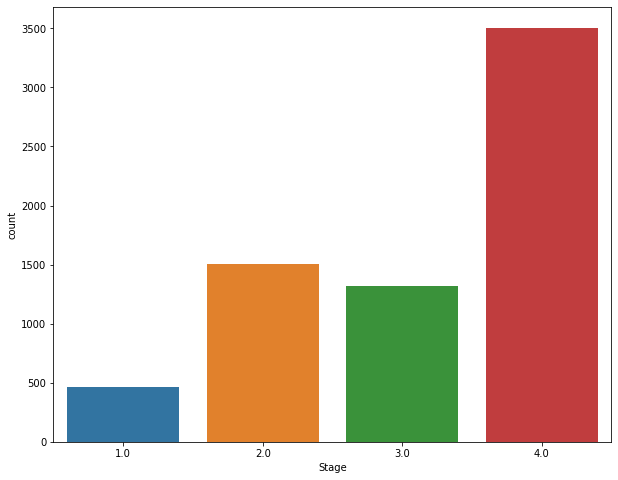

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='Stage',data=train)

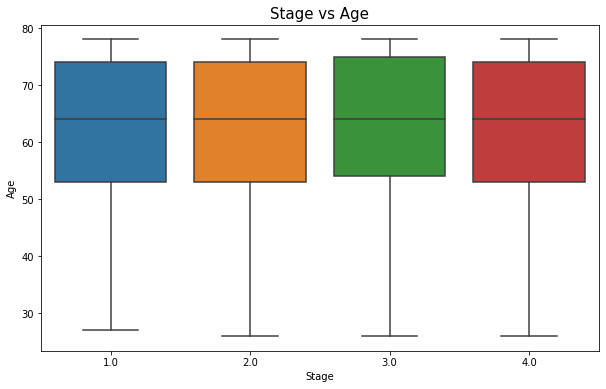

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train["Stage"], y=train["Age"])
plt.title("Stage vs Age", size=15)
plt.show()

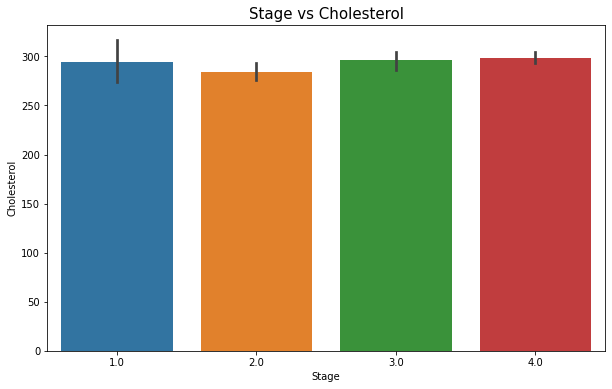

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=train["Stage"], y=train["Cholesterol"])
plt.title("Stage vs Cholesterol", size=15)
plt.show()

In [29]:
train.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,54,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,63,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,77,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,58,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,49,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


## **Analysis of continuious columns that have nan values**

In [30]:
df = train[['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']]

In [31]:
missing_percentage(df)

Cholesterol 45.60294117647059
Copper 31.705882352941178
Alk_Phos 36.73529411764706
SGOT 30.91176470588235
Tryglicerides 41.35294117647059
Platelets 4.970588235294118
Prothrombin 2.2794117647058822


In [32]:
df.isnull().sum()

Cholesterol      3101
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
dtype: int64

### 1. **Random Sample Imputation**

In [33]:
df_random = df.copy()
def impute_random(df,columns):
    for i in columns:
        random_sample=df[i].dropna().sample(df[i].isnull().sum(),random_state=0) 
    ## Replacing the NaN values with some random sampled value
    ##pandas need to have same index in order to merge the dataset
        random_sample.index=df[df[i].isnull()].index
        df.loc[df[i].isnull(),i]=random_sample

impute_random(df_random,df_random.columns)

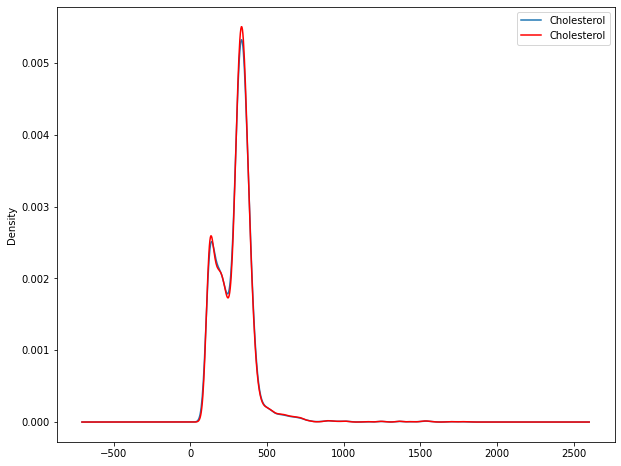

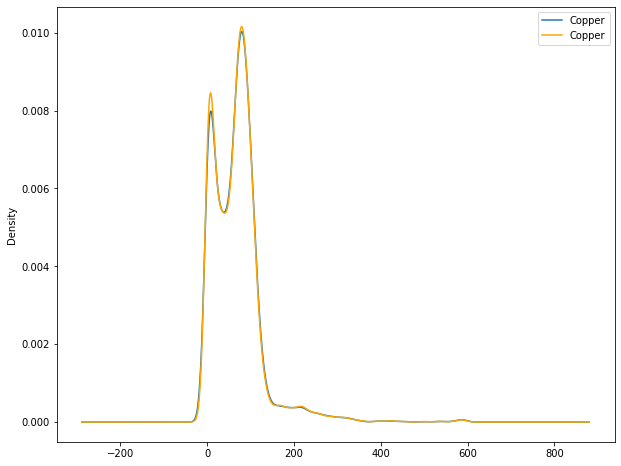

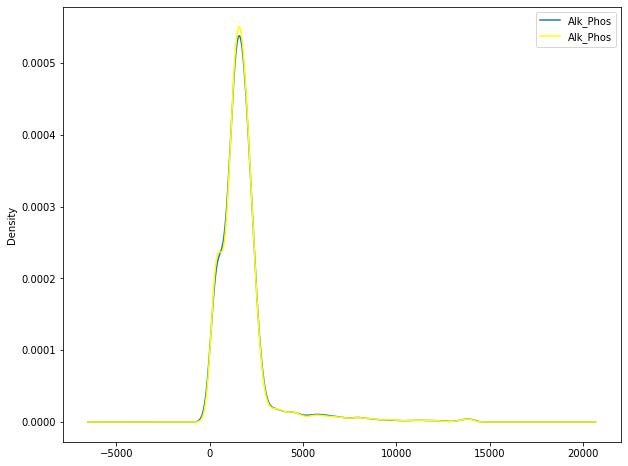

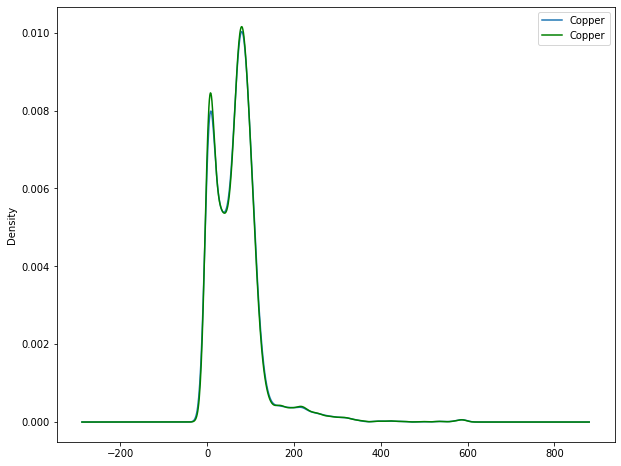

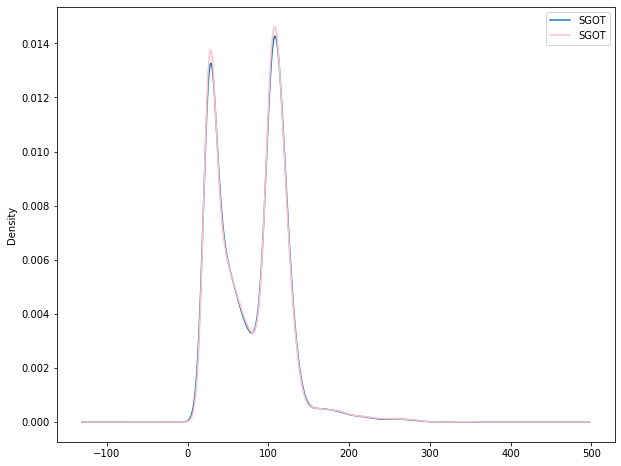

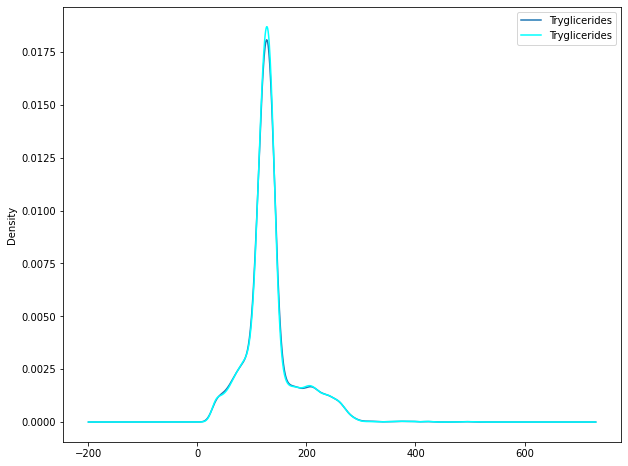

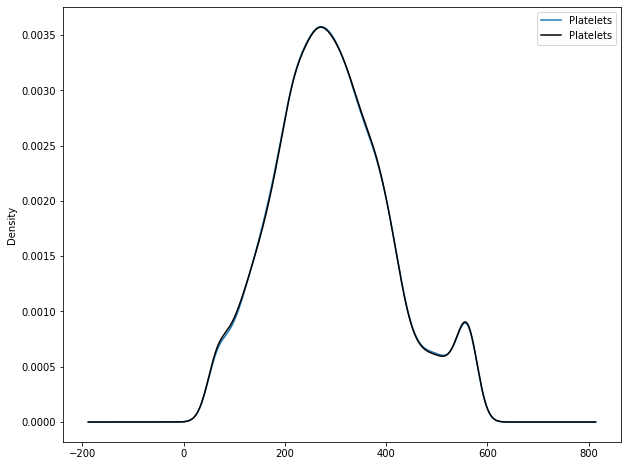

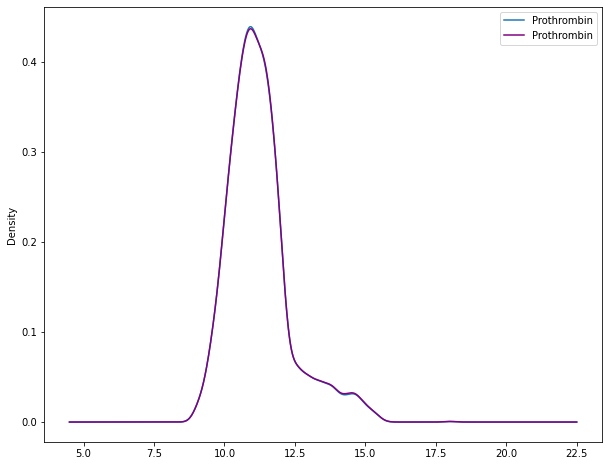

In [34]:
'''Comparision of Cholesterol after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Cholesterol'].plot(kind='kde', ax=ax)
df_random.Cholesterol.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Copper after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Copper'].plot(kind='kde', ax=ax)
df_random.Copper.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Alk_Phos after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Alk_Phos'].plot(kind='kde', ax=ax)
df_random.Alk_Phos.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Copper after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Copper'].plot(kind='kde', ax=ax)
df_random.Copper.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of SGOT after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['SGOT'].plot(kind='kde', ax=ax)
df_random.SGOT.plot(kind='kde', ax=ax, color='pink')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Tryglicerides after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Tryglicerides'].plot(kind='kde', ax=ax)
df_random.Tryglicerides.plot(kind='kde', ax=ax, color='cyan')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Platelets after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Platelets'].plot(kind='kde', ax=ax)
df_random.Platelets.plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Prothrombin after imputing with random values'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Prothrombin'].plot(kind='kde', ax=ax)
df_random.Prothrombin.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 2. **KNNImputer**

In [35]:
df_knn = df.copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10,weights='distance')
df_knn = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(df_knn,columns=df.columns)

In [36]:

df_knn.isnull().sum()

Cholesterol      0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

In [37]:
df_knn.head(3)

,Cholesterol,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,279.000000,84.000000,1500.800000,99.430000,109.0,293.0,10.2
1,306.349977,41.856734,1835.400000,26.350000,131.0,308.0,10.8
2,328.000000,4.000000,2991.331423,65.357299,116.0,194.0,10.3


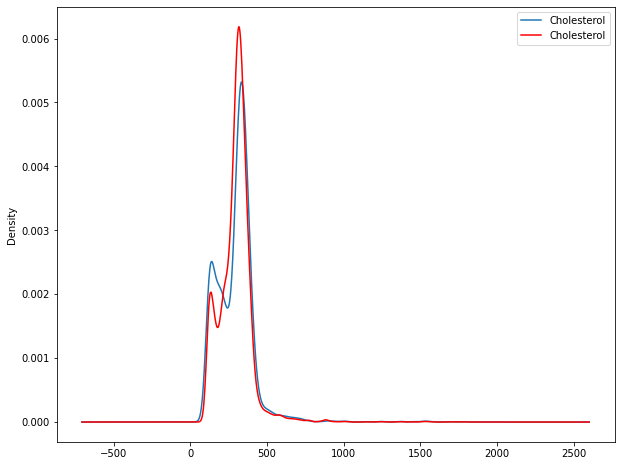

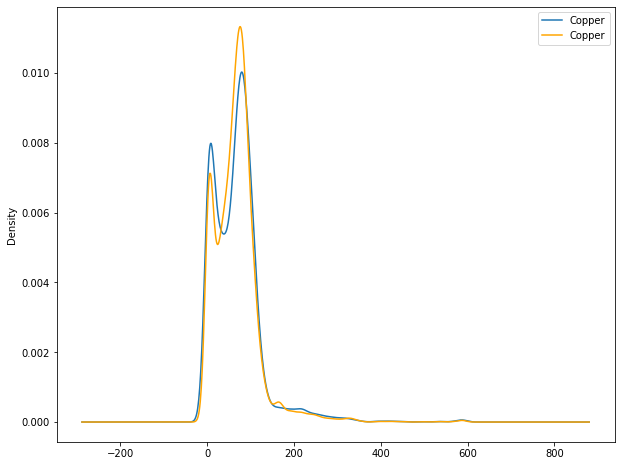

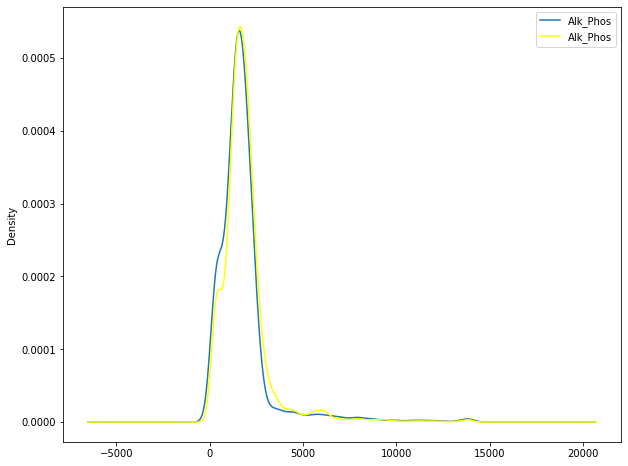

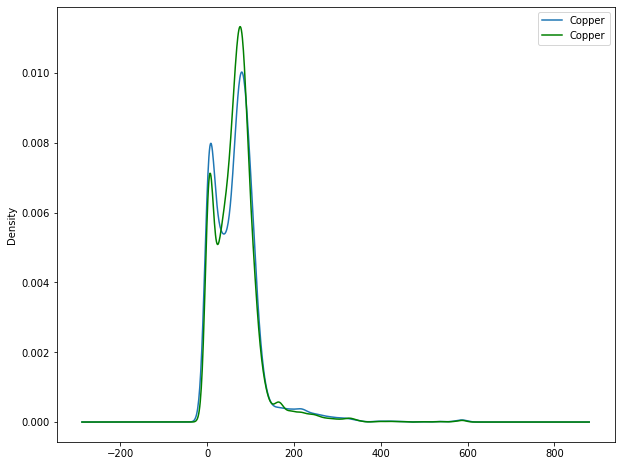

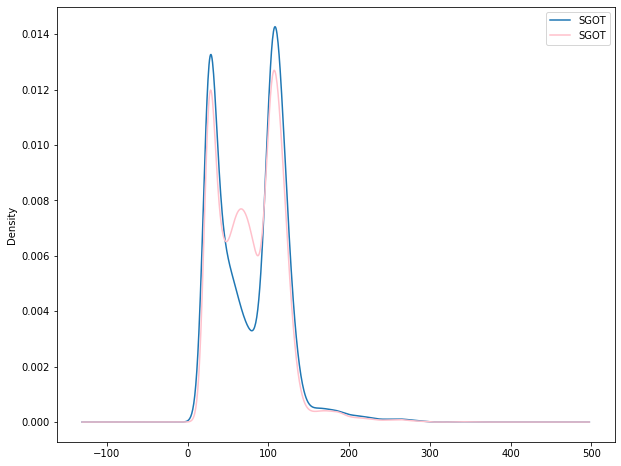

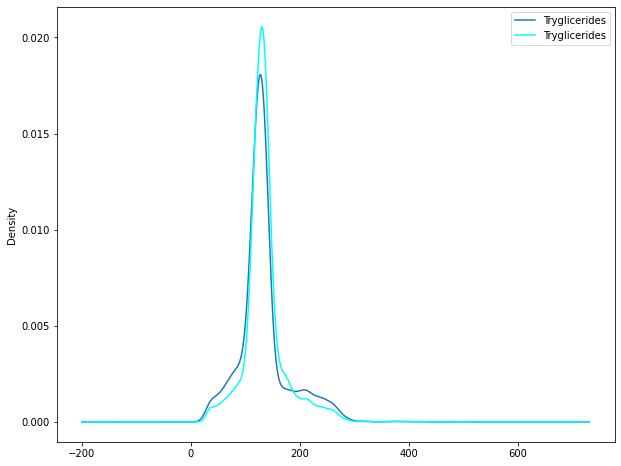

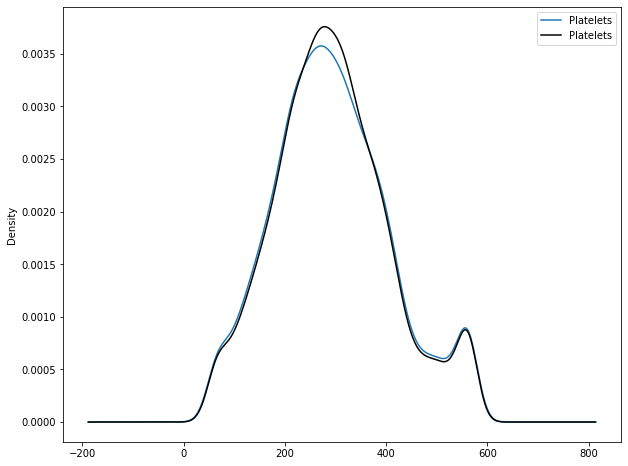

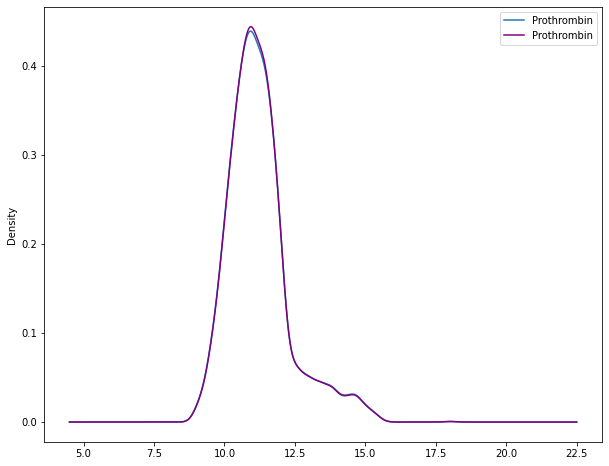

In [38]:
'''Comparision of Cholesterol after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Cholesterol'].plot(kind='kde', ax=ax)
df_knn.Cholesterol.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Copper after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Copper'].plot(kind='kde', ax=ax)
df_knn.Copper.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Alk_Phos after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Alk_Phos'].plot(kind='kde', ax=ax)
df_knn.Alk_Phos.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Copper after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Copper'].plot(kind='kde', ax=ax)
df_knn.Copper.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of SGOT after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['SGOT'].plot(kind='kde', ax=ax)
df_knn.SGOT.plot(kind='kde', ax=ax, color='pink')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Tryglicerides after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Tryglicerides'].plot(kind='kde', ax=ax)
df_knn.Tryglicerides.plot(kind='kde', ax=ax, color='cyan')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Platelets after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Platelets'].plot(kind='kde', ax=ax)
df_knn.Platelets.plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Prothrombin after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Prothrombin'].plot(kind='kde', ax=ax)
df_knn.Prothrombin.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 3. **IterativeImputer**

In [39]:
df_iter = df.copy()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(n_nearest_features=5, imputation_order='ascending')
df_iter = imputer.fit_transform(df_iter)
df_iter = pd.DataFrame(df_iter,columns=df.columns)

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


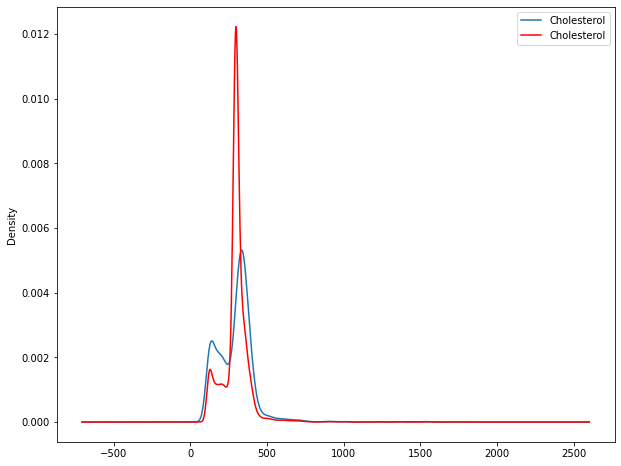

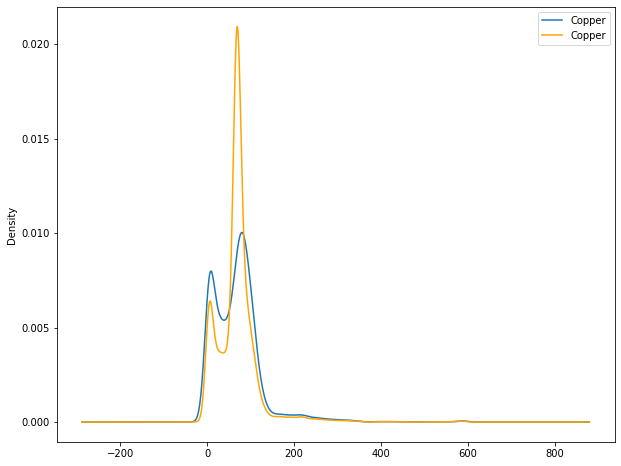

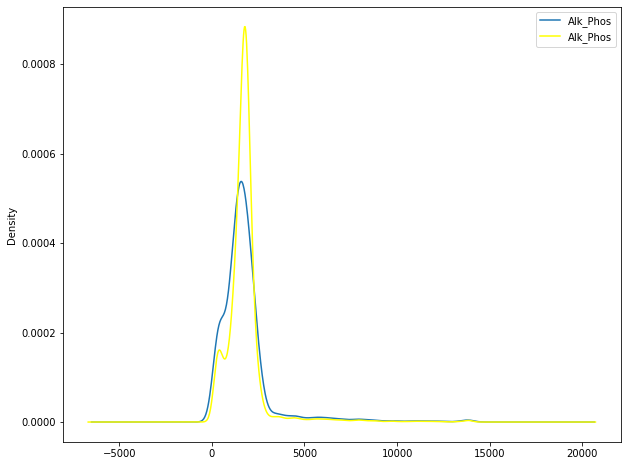

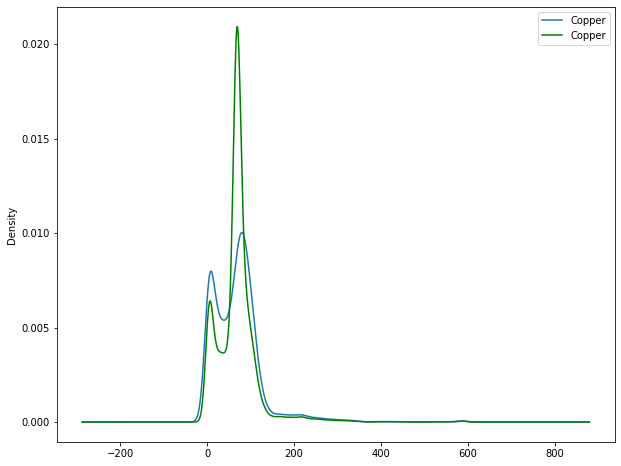

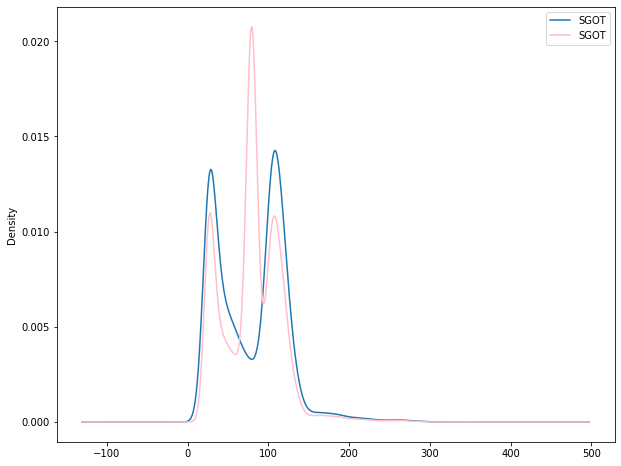

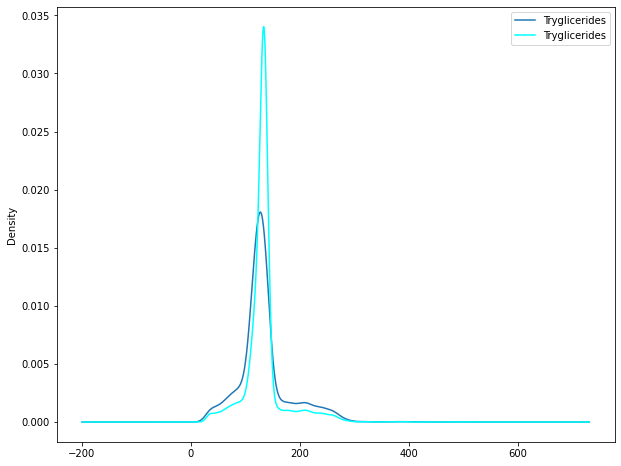

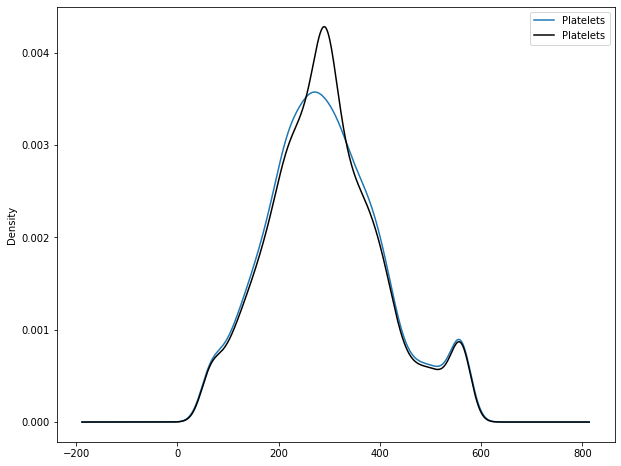

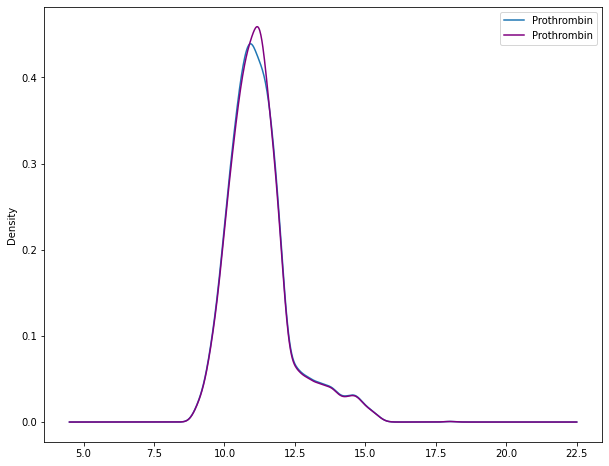

In [40]:
'''Comparision of Cholesterol after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Cholesterol'].plot(kind='kde', ax=ax)
df_iter.Cholesterol.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Copper after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Copper'].plot(kind='kde', ax=ax)
df_iter.Copper.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Alk_Phos after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Alk_Phos'].plot(kind='kde', ax=ax)
df_iter.Alk_Phos.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Copper after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Copper'].plot(kind='kde', ax=ax)
df_iter.Copper.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of SGOT after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['SGOT'].plot(kind='kde', ax=ax)
df_iter.SGOT.plot(kind='kde', ax=ax, color='pink')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Tryglicerides after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Tryglicerides'].plot(kind='kde', ax=ax)
df_iter.Tryglicerides.plot(kind='kde', ax=ax, color='cyan')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Platelets after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Platelets'].plot(kind='kde', ax=ax)
df_iter.Platelets.plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#############################################
'''Comparision of Prothrombin after knn imputer'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df['Prothrombin'].plot(kind='kde', ax=ax)
df_iter.Prothrombin.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

> Best results were produced in Random sample imputation but the KNN Imputer also produced good results but we'll use the outputs that we got from the knnimputer and use it in training our model.

In [41]:
train.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
dtype: int64

## **Analysis of categorical columns that have nan values**

In [42]:
cat = train[['Drug', 'Ascites','Hepatomegaly', 'Spiders']]

In [43]:
missing_percentage(cat)

Drug 29.779411764705884
Ascites 33.029411764705884
Hepatomegaly 35.69117647058823
Spiders 38.088235294117645


In [44]:
impute_random(cat,cat.columns)

In [45]:
cat.head()

,Drug,Ascites,Hepatomegaly,Spiders
0,D-penicillamine,N,N,Y
1,D-penicillamine,N,N,Y
2,D-penicillamine,N,N,N
3,D-penicillamine,N,Y,Y
4,D-penicillamine,N,N,Y


# **Transformations,Encoding and scaling**

In [46]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer, classification_report, accuracy_score, precision_score, auc
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
continious_columns = ['Age','Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin']
categorical_columns = ['Drug','Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [47]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
scaler_1 = RobustScaler()
scaler_2 = StandardScaler()
scaler_3 = MinMaxScaler()
#################################################################
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
xg = XGBClassifier()
lgb_clf = lgb.LGBMClassifier()
rf_clf = RandomForestClassifier()
gnb_clf = GaussianNB()
bnb_clf = BernoulliNB()
cnb_clf = CategoricalNB()


In [48]:
train.Stage = le.fit_transform(train.Stage)

In [49]:
X = train.drop(columns=['ID','Stage','N_Days','Status'],axis=1)
y = train.Stage

In [50]:
## Imputing missing categorical values
impute_random(X,categorical_columns)

In [51]:
## categorical encodings
X = pd.get_dummies(X, columns = categorical_columns,drop_first=True,sparse=False)

In [52]:
## KNN Imputer on X
imputer = KNNImputer(n_neighbors=10,weights='distance')
X_impute = imputer.fit_transform(X)
X = pd.DataFrame(X_impute,columns=X.columns)

In [53]:
#### Standard scaler on X_train and X_valid
scaler_2.fit(X)

X_scaled = scaler_2.transform(X)

In [54]:
X = pd.DataFrame(X_scaled,columns=X.columns)

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True,stratify=y,random_state=0)


In [56]:
X_train.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
6369,0.192215,0.650715,0.254317,0.745812,0.191883,-0.378879,0.029545,-0.341425,-0.829963,0.693224,1.017806,-0.406671,-0.385298,1.184768,-0.663836,-0.420811,3.752014
4089,0.034814,0.557483,0.267989,0.840487,-0.598581,-0.775184,0.944716,-0.612311,-0.723420,-1.824723,1.017806,2.458990,-0.385298,1.184768,-0.663836,-0.420811,-0.266524
1944,0.507019,-0.001910,-0.075469,-1.583181,-0.771541,-0.165372,-0.077601,-0.030015,0.093406,-0.925456,-0.982506,-0.406671,2.595393,-0.844047,-0.663836,2.376366,-0.266524
5410,0.192215,0.961489,0.542489,-0.503891,0.299559,0.088275,0.802565,-0.241018,-1.460340,-1.015383,1.017806,2.458990,-0.385298,-0.844047,-0.663836,-0.420811,-0.266524
5486,-2.011409,4.224616,1.038476,0.537528,-0.163771,7.842070,0.609509,-0.502306,-0.146315,-0.385896,1.017806,-0.406671,-0.385298,-0.844047,-0.663836,-0.420811,-0.266524


In [57]:
len(X_train.columns)

17

In [58]:
X_train.isnull().sum()

Age               0
Bilirubin         0
Cholesterol       0
Albumin           0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Drug_Placebo      0
Sex_M             0
Ascites_Y         0
Hepatomegaly_Y    0
Spiders_Y         0
Edema_S           0
Edema_Y           0
dtype: int64

# **Training various models**

## 1.  **Using Naive Bayes**


In [59]:
model_1 = gnb_clf.fit(X_train,y_train)
pred_1 = gnb_clf.predict(X_valid)
score_1 = f1_score(pred_1,y_valid,average='weighted')
print(score_1)


0.6090556693146417


In [60]:
cross_val_score(gnb_clf,X_train,y_train,cv=StratifiedKFold(shuffle=True),scoring='f1_weighted').mean()

0.3680690495468593

In [61]:
model_2 = bnb_clf.fit(X_train,y_train)
pred_2 = bnb_clf.predict(X_valid)
score_2 = f1_score(pred_2,y_valid,average='weighted')
print(score_2)

0.6804657179818888


In [62]:
cross_val_score(bnb_clf,X_train,y_train,cv=StratifiedKFold(shuffle=True),scoring='f1_weighted').mean()

0.35074876245635817

In [63]:
f1 = []
skfl = StratifiedKFold(n_splits=15,random_state=None)
skfl.get_n_splits(X,y)
for train_index,test_index in skfl.split(X,y):
    print('train:',train_index,'validation:',test_index)
    X1_train , X1_valid = X.iloc[train_index] , X.iloc[test_index]
    y1_train , y1_valid = y.iloc[train_index] , y.iloc[test_index]
    
     
    strat_model_1 = bnb_clf.fit(X1_train,y1_train)
    prediction = strat_model_1.predict(X1_valid)
    score = f1_score(prediction,y1_valid,average='weighted')
    f1.append(score)
    
print(f1)

train: [ 427  429  439 ... 6797 6798 6799] validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [64]:
print(np.mean(f1))

0.6803800134279945


In [65]:
## This model is only used when scaling is done using min_max_scaler
#model_3 = cnb_clf.fit(X_train,y_train)
#pred_3 = cnb_clf.predict(X_valid)
#score_3 = f1_score(pred_3,y_valid,average='weighted')
#print(score)

## 2. **XGBoost** 

In [66]:
model_4 = xg.fit(X_train,y_train)
pred_4 = xg.predict(X_valid)
score_4 = f1_score(pred_4,y_valid,average='weighted')
print(score_4)

0.538181370300488


In [67]:
cross_val_score(xg,X_train,y_train,cv=StratifiedKFold(shuffle=True),scoring='f1_weighted').mean()

0.37671368284999096

In [68]:
f1 = []
skfl = StratifiedKFold(n_splits=15,random_state=None)
skfl.get_n_splits(X,y)
for train_index,test_index in skfl.split(X,y):
    print('train:',train_index,'validation:',test_index)
    X1_train , X1_valid = X.iloc[train_index] , X.iloc[test_index]
    y1_train , y1_valid = y.iloc[train_index] , y.iloc[test_index]
    
     
    strat_model_2 = xg.fit(X1_train,y1_train)
    prediction = strat_model_2.predict(X1_valid)
    score = f1_score(prediction,y1_valid,average='weighted')
    f1.append(score)
    
print(np.mean(f1))

train: [ 427  429  439 ... 6797 6798 6799] validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [69]:

params={
 'n_estimators': [50,100, 150, 200, 300,350,400,500,600],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5,6, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5 ],
 "subsample"        : [0.5,0.6,0.7,0.8,0.9],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 'base_score': [0.2, 0.5, 0.7, 1]
}



In [81]:
rs_xg=RandomizedSearchCV(xg,param_distributions=params,n_jobs=-1,n_iter=50,cv=5,verbose=3,scoring='f1_weighted')


In [82]:
rs_xg.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END base_score=0.2, colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.382 total time=  17.9s
[CV 2/5] END base_score=0.2, colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7, n_estimators=500, subsample=0.5;, score=0.372 total time=  14.3s
[CV 5/5] END base_score=0.2, colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7, n_estimators=500, subsample=0.5;, score=0.390 total time=  13.6s
[CV 3/5] END base_score=0.7, colsample_bytree=0.4, gamma=0.5, learning_rate=0.15, max_depth=8, min_child_weight=3, n_estimators=400, subsample=0.7;, score=0.391 total time=  13.6s
[CV 2/5] END base_score=0.2, colsample_bytree=0.7, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=6, n_estimators=500, subsample=0.9;, score=0.366 total time=  17.4s
[CV 1/5] END base_score=0.7, colsample_by

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.2, 0.5, 0.7, 1],
                       

In [83]:
rs_xg.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'min_child_weight': 6,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.3,
 'base_score': 0.2}

In [84]:
rs_xg.best_score_ 

0.3884454961541195

In [85]:
rs_xg.score(X_valid,y_valid)

0.37578216851970964

In [86]:
pred_rs_xg = rs_xg.predict(X_valid)
score_rs = f1_score(pred_rs_xg,y_valid,average='weighted')
print(score_rs)

0.5075511648136237


## 3.  **RandomForest Classifier**

In [70]:
model_5 = rf_clf.fit(X_train,y_train)
pred_5 = rf_clf.predict(X_valid)
score_5 = f1_score(pred_5,y_valid,average='weighted')
print(score_5)

0.6597138500362353


In [71]:
cross_val_score(rf_clf,X_train,y_train,cv=StratifiedKFold(shuffle=True),scoring='f1_weighted').mean()

0.358733785585839

In [72]:
f1 = []
skfl = StratifiedKFold(n_splits=15,random_state=None)
skfl.get_n_splits(X,y)
for train_index,test_index in skfl.split(X,y):
    print('train:',train_index,'validation:',test_index)
    X1_train , X1_valid = X.iloc[train_index] , X.iloc[test_index]
    y1_train , y1_valid = y.iloc[train_index] , y.iloc[test_index]
    
     
    strat_model_3 = rf_clf.fit(X1_train,y1_train)
    prediction = strat_model_3.predict(X1_valid)
    score = f1_score(prediction,y1_valid,average='weighted')
    f1.append(score)
    
print(np.mean(f1))

train: [ 427  429  439 ... 6797 6798 6799] validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

In [82]:
from sklearn.metrics import classification_report
print(classification_report(pred_4,y_valid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.11      0.21      0.14       228
           2       0.06      0.18      0.09       138
           3       0.82      0.52      0.63      1665

    accuracy                           0.46      2040
   macro avg       0.25      0.23      0.22      2040
weighted avg       0.68      0.46      0.54      2040



In [91]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [92]:
rs_rf=RandomizedSearchCV(rf_clf,param_distributions=random_grid,n_jobs=-1,n_iter=50,cv=5,verbose=3,scoring='f1_weighted')


In [93]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

[CV 3/5] END base_score=0.2, colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.6;, score=0.352 total time=   3.6s
[CV 1/5] END base_score=0.7, colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.9;, score=0.376 total time=   1.2s
[CV 4/5] END base_score=0.7, colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.9;, score=0.377 total time=   1.2s
[CV 2/5] END base_score=0.5, colsample_bytree=0.4, gamma=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.6;, score=0.387 total time=   3.0s
[CV 5/5] END base_score=0.5, colsample_bytree=0.4, gamma=0.5, learning_rate=0.3, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.6;, score=0.392 total time=   3.0s
[CV 4/5] END base_score=0.2, colsample_bytr

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   scoring='f1_weighted', verbose=3)

In [94]:
rs_rf.best_score_

0.3640030015822639

In [95]:
rs_rf.score(X_valid,y_valid)

0.363892604864955

In [96]:
pred_rs_rf = rs_rf.predict(X_valid)
score_rs = f1_score(pred_rs_rf,y_valid,average='weighted')
print(score_rs)

0.651793669644849


## 4. **LightGBM** 

In [77]:
model_6 = lgb_clf.fit(X_train,y_train)
pred_6 = lgb_clf.predict(X_valid)
score_6 = f1_score(pred_6,y_valid,average='weighted')
print(score_6)

0.5831070000733293


In [78]:
cross_val_score(lgb_clf,X_train,y_train,cv=StratifiedKFold(shuffle=True),scoring='f1_weighted').mean()

0.3712389392519623

In [79]:
f1 = []
skfl = StratifiedKFold(n_splits=15,random_state=None)
skfl.get_n_splits(X,y)
for train_index,test_index in skfl.split(X,y):
    print('train:',train_index,'validation:',test_index)
    X1_train , X1_valid = X.iloc[train_index] , X.iloc[test_index]
    y1_train , y1_valid = y.iloc[train_index] , y.iloc[test_index]
    
     
    strat_model_4 = lgb_clf.fit(X1_train,y1_train)
    prediction_4 = strat_model_4.predict(X1_valid)
    score = f1_score(prediction_4,y1_valid,average='weighted')
    f1.append(score)
    
print(np.mean(f1))

train: [ 427  429  439 ... 6797 6798 6799] validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

# **Test Data**

In [101]:
test.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,62.0,1.4,247.000000,3.62,55.697553,2518.311195,108.650000,116.649130,169.0,11.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44.0,0.3,311.000000,2.80,92.000000,1748.100000,98.786142,129.000000,321.0,11.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,74.0,0.4,365.535785,3.56,72.796589,1452.289257,43.520000,133.634512,296.0,10.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.0,1.2,323.029185,3.16,113.643248,617.100000,113.760000,126.987329,125.0,10.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,49.0,3.2,302.154984,2.36,89.000000,1782.400000,116.735353,129.000000,138.0,10.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
test = test.drop(columns=['ID','N_Days','Status'],axis=1)

In [97]:
impute_random(test,categorical_columns)


In [98]:
test = pd.get_dummies(test, columns = categorical_columns,drop_first=True,sparse=False)

In [99]:
imputer = KNNImputer(n_neighbors=10,weights='distance')
test_knn = imputer.fit_transform(test)
test = pd.DataFrame(test_knn,columns=test.columns)

In [100]:
test_scaled = scaler_2.transform(test)

In [102]:
test = pd.DataFrame(test_scaled,columns=test.columns)

In [104]:
test.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,-0.043887,-0.126220,-0.530463,1.105575,-0.264973,0.463956,0.829912,-0.515532,-1.105198,0.333517,1.017806,-0.406671,-0.385298,-0.844047,-0.663836,-0.420811,-0.266524
1,-1.460503,-0.468071,0.117357,-0.447086,0.446755,-0.107332,0.562833,-0.187976,0.244341,0.243591,-0.982506,-0.406671,-0.385298,1.184768,-0.663836,-0.420811,-0.266524
2,0.900523,-0.436994,0.669379,0.991966,0.070262,-0.326743,-0.933581,-0.065064,0.022377,-0.835530,-0.982506,-0.406671,-0.385298,-0.844047,-0.663836,-0.420811,-0.266524
3,-1.224400,-0.188375,0.239119,0.234570,0.871081,-0.946227,0.968273,-0.241354,-1.495854,-0.295969,1.017806,-0.406671,-0.385298,1.184768,-0.663836,-0.420811,-0.266524
4,-1.066999,0.433173,0.027826,-1.280222,0.387938,-0.081891,1.048835,-0.187976,-1.380433,-0.565749,-0.982506,-0.406671,-0.385298,-0.844047,1.506397,-0.420811,-0.266524


In [117]:
y_5 = model_5.predict(test)
y_1 = model_1.predict(test)
y_2 = model_2.predict(test)
y_4 = model_4.predict(test)
y_6 = model_6.predict(test)

In [118]:
print(np.unique(y_1))
print(np.unique(y_2))
print(np.unique(y_4))
print(np.unique(y_5))
print(np.unique(y_6))


[0 1 2 3]
[3]
[0 1 2 3]
[1 2 3]
[0 1 2 3]


# **Deployment**

In [83]:
import pickle
pickle.dump(model_4, open('model.pkl','wb'))

In [84]:
loaded_model = pickle.load(open('./model.pkl','rb'))

In [85]:
pickle.dump(scaler_2,open('scaler.pkl','wb'))

In [86]:
loaded_model.predict(X_valid.head(20))

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 2, 3, 1, 1, 1])

In [87]:
y_valid.head(20)

6299    3
2220    0
2980    3
5704    3
783     3
4786    3
5409    3
4875    3
5508    3
5436    3
2143    1
3025    3
5076    1
1720    1
2675    1
4921    2
2650    3
413     1
1897    1
3246    1
Name: Stage, dtype: int64

#### 